# Final Project Submission

Please fill out:
* Student name: Linda Hutsal
* Student pace: self paced / part time / full time: self paced
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL:


First, I'll import the libraries needed and call the appropriate settings

In [1]:
import pandas as pd #Alias pandas as pd
import matplotlib.pyplot as plt #Alias matplotlib as plt
import numpy as np #Alias numpy as np
import seaborn as sns #Alias seaborn as sns
from glob import glob
import os

#Magic function to allow plot outputs to appear and be stored in the notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,}'.format

Next is importing the various data sets using the pandas dataframes:
1. Box Office Mojo, which is in a csv file
2. IMDB, which is in a sqlite database file

For each dataset, we'll look at:
1. a sample of the data
2. the info for the dataset, including data types and count of non-null values
3. the describe table for the dataset, which includes statisticl summary values

In [2]:
#Import and view Box Office Magic data
df_bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
print(df_bom.shape)
df_bom.head()

(3387, 5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,"415,000,000.0",652000000,2010
1,Alice in Wonderland (2010),BV,"334,200,000.0",691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.0",664300000,2010
3,Inception,WB,"292,600,000.0",535700000,2010
4,Shrek Forever After,P/DW,"238,700,000.0",513900000,2010


Now let's look at the data types and number of non-null values

In [3]:
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


I'll convert the foreign_gross to a float64, in order to get the dollar amounts where there is a value

In [4]:
df_bom['foreign_gross'] = pd.to_numeric(df_bom["foreign_gross"], errors='coerce')
df_bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2032 non-null   float64
 4   year            3387 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


In [5]:
df_bom.describe()

,domestic_gross,foreign_gross,year
count,"3,359.0","2,032.0","3,387.0"
mean,"28,745,845.06698422","75,057,041.62549213","2,013.9580749926188"
std,"66,982,498.23736456","137,529,351.2001863",2.4781410973889657
min,100.0,600.0,"2,010.0"
25%,"120,000.0","3,775,000.0","2,012.0"
50%,"1,400,000.0","18,900,000.0","2,014.0"
75%,"27,900,000.0","75,050,000.0","2,016.0"
max,"936,700,000.0","960,500,000.0","2,018.0"


In [6]:
#Import and view Rotten Tomatoes Movie Info
df_rt_mi = pd.read_csv("zippedData/rt.movie_info.tsv.gz", sep='\t')
df_rt_mi.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [7]:
#Import and view Rotten Tomatoes Reviews
#df_rt_rev = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t')
#df_rt_rev.head()

#issue loading the file
#opened in Numbers and showed the encoding is Western (Windows Latin 1)

In [8]:
#Import and view Rotten Tomatoes Reviews with Latin-1 encoding
df_rt_rev = pd.read_csv("zippedData/rt.reviews.tsv.gz", sep='\t', encoding="latin-1")
df_rt_rev.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [9]:
#Import and view The Movie DB
df_movie_db = pd.read_csv("zippedData/tmdb.movies.csv.gz")
df_movie_db.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.3,22186


In [10]:
#Import and view The Numbers
df_the_numbers = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
df_the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [11]:
df_the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


I'll need to update the production_budget, domestic_gross, and worldwide_gross to numbers instead of object


In [12]:
#df_the_numbers['production_budget'] = pd.to_numeric(df_the_numbers["production_budget"], errors='coerce')
#df_the_numbers['domestic_gross'] = pd.to_numeric(df_the_numbers["domestic_gross"], errors='coerce')
#df_the_numbers['worldwide_gross'] = pd.to_numeric(df_the_numbers["worldwide_gross"], errors='coerce')
df_the_numbers['production_budget'] = df_the_numbers['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
df_the_numbers['domestic_gross'] = df_the_numbers['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
df_the_numbers['worldwide_gross'] = df_the_numbers['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(int)



df_the_numbers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [13]:
df_the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [14]:
#View IMDB data via sql
import sqlite3
conn = sqlite3.connect('zippedData/im.db')

pd.read_sql(""" SELECT name FROM sqlite_master WHERE type ='table'
        ;""", conn)


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [15]:
df_movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn)
df_movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [16]:
df_movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [17]:
df_movie_basics.describe()

,start_year,runtime_minutes
count,"146,144.0","114,405.0"
mean,"2,014.6217976790015",86.18724706088021
std,2.7335829231921163,166.36059015397228
min,"2,010.0",1.0
25%,"2,012.0",70.0
50%,"2,015.0",87.0
75%,"2,017.0",99.0
max,"2,115.0","51,420.0"


In [18]:
df_movie_ratings = pd.read_sql(""" SELECT * FROM movie_ratings; """, conn)
df_movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [19]:
df_movie_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [20]:
df_movie_ratings.describe()

,averagerating,numvotes
count,"73,856.0","73,856.0"
mean,6.332728552859619,"3,523.6621669194105"
std,1.4749783548957056,"30,294.022971107453"
min,1.0,5.0
25%,5.5,14.0
50%,6.5,49.0
75%,7.4,282.0
max,10.0,"1,841,066.0"


I've now loaded all of the data sources, and while I'd love to use all of the information, in order to keep this focused and efficient with time, I will only use the four dataframes listed below.

Data Cleaning
1. Check for duplicates in the dataframes I'm focusing on:
df_bom
df_the_numbers
df_movie_basics
df_movie_ratings
2. Look for placeholder values
3. Check for duplicates on title, which will be used to combine the datasets

In [21]:
print(df_bom.duplicated().any())
print(df_the_numbers.duplicated().any())
print(df_movie_basics.duplicated().any())
print(df_movie_ratings.duplicated().any())

False
False
False
False


In [22]:
df_bom.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [23]:
df_the_numbers.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

id                     0
release_date           0
movie                  0
production_budget      0
domestic_gross       548
worldwide_gross      367
dtype: int64

There are some NA's from doing the type conversion, but I only really need the production budget column from this dataset. The domestic and worldwide gross can be used to sanity check when combining the data sets.

In [24]:
df_movie_basics.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id           0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [25]:
df_movie_ratings.isin(['?', '#', 'NaN', 'null', 'N/A', '-', 0]).sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [26]:
df_bom['title'].duplicated().sum()

1

There's one duplicate value. Let's look at it below and see if it has a material domestic or foreign gross.

In [27]:
df_bom[df_bom.duplicated('title', keep=False) == True]

,title,studio,domestic_gross,foreign_gross,year
317,Bluebeard,Strand,"33,500.0","5,200.0",2010
3045,Bluebeard,WGUSA,"43,100.0",nan,2017


Now let's look at the primary title field in df_movie_basics:

In [28]:
df_the_numbers['movie'].duplicated().sum()

84

In [29]:
df_the_numbers[df_the_numbers.duplicated('movie', keep=False) == True]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
38,39,"May 14, 2010",Robin Hood,210000000,105487148,322459006
39,40,"Dec 14, 2005",King Kong,207000000,218080025,550517357
50,51,"Mar 5, 2010",Alice in Wonderland,200000000,334191110,1025491110
64,65,"Jun 9, 2017",The Mummy,195000000,80101125,409953905
...,...,...,...,...,...,...
5668,69,"Nov 16, 1942",Cat People,134000,4000000,8000000
5676,77,"Oct 1, 1968",Night of the Living Dead,114000,12087064,30087064
5677,78,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000
5699,100,"Aug 30, 1972",The Last House on the Left,87000,3100000,3100000


In [30]:
df_the_numbers[df_the_numbers['movie']=='The Avengers']

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
26,27,"May 4, 2012",The Avengers,225000000,623279547,1517935897
934,35,"Aug 14, 1998",The Avengers,60000000,23385416,48585416


In [31]:
df_the_numbers['year'] = df_the_numbers['release_date'].str[-4:]
df_the_numbers['year'].max()

'2020'

In [32]:
df_the_numbers['title_year'] = df_the_numbers['movie']+"_"+df_the_numbers['year']
df_the_numbers.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,title_year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,Avatar_2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,Pirates of the Caribbean: On Stranger Tides_2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,Dark Phoenix_2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,Avengers: Age of Ultron_2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,Star Wars Ep. VIII: The Last Jedi_2017


In [33]:
df_the_numbers['title_year'].duplicated().sum()

1

In [34]:
df_the_numbers[df_the_numbers.duplicated('title_year', keep=False) == True]

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,title_year
3455,56,"Jun 5, 2009",Home,12000000,0,0,2009,Home_2009
5459,60,"Apr 23, 2009",Home,500000,15433,44793168,2009,Home_2009


This movie is not significant and will not tie into the dataset since it's from 2009 and the other data starts after 2010, so it can be ignored.

In [35]:
df_movie_basics['primary_title'].duplicated().sum()

10073

There's a lot more duplicates, which isn't too surprising given how much more data is in the IMDB dataset. Let's first explore the duplicate that we saw in the df_bom: Bluebeard

In [36]:
df_movie_basics[df_movie_basics['primary_title']=='Bluebeard']

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
40404,tt2442772,Bluebeard,Barbazul,2012,98.0,Horror
112563,tt6599340,Bluebeard,Haebing,2017,117.0,Thriller


We see that there are also 2 records, with two different years as well. Perhaps we can create a combined field to join the datasets on to create more accuracy than simply the title.

First let's join the IMDB data into one dataframe

In [37]:
df_imdb = pd.read_sql(""" SELECT * FROM movie_basics
                        JOIN movie_ratings USING(movie_id)

; """, conn)
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [38]:
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [39]:
df_imdb.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,"73,856.0","66,236.0","73,856.0","73,856.0"
mean,"2,014.276131932409",94.6540400990398,6.332728552859619,"3,523.6621669194105"
std,2.614807009690716,208.57411133795523,1.4749783548957056,"30,294.02297110745"
min,"2,010.0",3.0,1.0,5.0
25%,"2,012.0",81.0,5.5,14.0
50%,"2,014.0",91.0,6.5,49.0
75%,"2,016.0",104.0,7.4,282.0
max,"2,019.0","51,420.0",10.0,"1,841,066.0"


In [40]:
df_imdb['primary_title'].duplicated().sum()

3863

There are still 3,863 duplicates based on title alone, once the movie_basics and movie_ratings have been combined.

In [41]:
df_imdb['title_year'] = df_imdb['primary_title']+"_"+df_imdb.start_year.astype(str)
df_imdb.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,Sunghursh_2013
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,One Day Before the Rainy Season_2019
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517,The Other Side of the Wind_2018
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,nan,"Comedy,Drama",6.1,13,Sabse Bada Sukh_2018
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119,The Wandering Soap Opera_2017


Now let's check to see how many duplicate values we get for the new combined title and year field:

In [42]:
df_imdb['title_year'].duplicated().sum()

585

Let's look to see if we can take the record that has the most number of votes

In [43]:
df_imdb_dup = df_imdb[df_imdb['title_year'].duplicated(keep=False)].sort_values(by=['title_year', 'numvotes'], ascending=False)
df_imdb_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1135 entries, 56862 to 14576
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         1135 non-null   object 
 1   primary_title    1135 non-null   object 
 2   original_title   1135 non-null   object 
 3   start_year       1135 non-null   int64  
 4   runtime_minutes  1032 non-null   float64
 5   genres           1122 non-null   object 
 6   averagerating    1135 non-null   float64
 7   numvotes         1135 non-null   int64  
 8   title_year       1135 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 88.7+ KB


In [44]:
df_imdb_dup.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
56862,tt5815346,Zoom,Zoom,2016,158.0,"Comedy,Drama,Romance",7.2,85,Zoom_2016
62945,tt6667868,Zoom,Zoom,2016,nan,Horror,5.4,17,Zoom_2016
49080,tt4842680,Zeus,Zeus,2016,115.0,"Biography,Drama,History",6.5,44,Zeus_2016
58771,tt6066078,Zeus,Zeus,2016,105.0,Drama,7.3,30,Zeus_2016
23668,tt2380333,Worm,Worm,2013,93.0,"Horror,Romance,Sci-Fi",6.2,85,Worm_2013


In [45]:
df_imdb_dup.drop_duplicates(subset='title_year', keep='first',inplace=True)
df_imdb_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 550 entries, 56862 to 12111
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         550 non-null    object 
 1   primary_title    550 non-null    object 
 2   original_title   550 non-null    object 
 3   start_year       550 non-null    int64  
 4   runtime_minutes  519 non-null    float64
 5   genres           549 non-null    object 
 6   averagerating    550 non-null    float64
 7   numvotes         550 non-null    int64  
 8   title_year       550 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 43.0+ KB


We're left with 550 entries, which means some of the duplicates had more than 2 records.

Now let's remove the duplicates from the imdb dataframe and append the cleaned up df_imdb_dup dataframe

In [46]:
df_imdb['title_year'].duplicated(keep=False).sum()

1135

In [47]:
df_imdb.drop_duplicates(subset='title_year', keep=False, inplace=True)
df_imdb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72721 entries, 0 to 73855
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         72721 non-null  object 
 1   primary_title    72721 non-null  object 
 2   original_title   72721 non-null  object 
 3   start_year       72721 non-null  int64  
 4   runtime_minutes  65204 non-null  float64
 5   genres           71930 non-null  object 
 6   averagerating    72721 non-null  float64
 7   numvotes         72721 non-null  int64  
 8   title_year       72721 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ MB


Now we have 72,721 records, versus the 73,856 from earlier, which is a difference of 1,135 (exactly the number of duplicates found above). 

Now we'll append the cleaned up 550 entries and will expect a total of 73,271 records

In [48]:
df_imdb_clean = df_imdb.append(df_imdb_dup) 
df_imdb_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73271 entries, 0 to 12111
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73271 non-null  object 
 1   primary_title    73271 non-null  object 
 2   original_title   73271 non-null  object 
 3   start_year       73271 non-null  int64  
 4   runtime_minutes  65723 non-null  float64
 5   genres           72479 non-null  object 
 6   averagerating    73271 non-null  float64
 7   numvotes         73271 non-null  int64  
 8   title_year       73271 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.6+ MB


In [49]:
df_imdb_clean.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,"73,271.0","65,723.0","73,271.0","73,271.0"
mean,"2,014.2753476818932",94.68806962554966,6.332524463976198,"3,550.79122708848"
std,2.615655224257939,209.37797851151737,1.4754863362111563,"30,413.17698729149"
min,"2,010.0",3.0,1.0,5.0
25%,"2,012.0",81.0,5.5,14.0
50%,"2,014.0",91.0,6.5,49.0
75%,"2,016.0",104.0,7.4,285.0
max,"2,019.0","51,420.0",10.0,"1,841,066.0"


Now let's confirm that there's no duplicate values so that we can join on the Box Office Mojo data

In [50]:
df_imdb_clean['title_year'].duplicated(keep=False).sum()

0

Now let's create the combined title and year field for the df_bom data 

In [51]:
df_bom['title_year'] = df_bom['title']+"_"+df_bom.year.astype(str)
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year,title_year
0,Toy Story 3,BV,"415,000,000.0","652,000,000.0",2010,Toy Story 3_2010
1,Alice in Wonderland (2010),BV,"334,200,000.0","691,300,000.0",2010,Alice in Wonderland (2010)_2010
2,Harry Potter and the Deathly Hallows Part 1,WB,"296,000,000.0","664,300,000.0",2010,Harry Potter and the Deathly Hallows Part 1_2010
3,Inception,WB,"292,600,000.0","535,700,000.0",2010,Inception_2010
4,Shrek Forever After,P/DW,"238,700,000.0","513,900,000.0",2010,Shrek Forever After_2010


Check on the Bluebeard title to see how it appears in both datasets before we combine them

In [52]:
print(df_imdb_clean[df_imdb_clean['primary_title']=='Bluebeard'])
print(df_bom[df_bom['title']=="Bluebeard"])

#print(df_imdb_clean[df_imdb_clean['primary_title']=='Solace'])
#print(df_bom[df_bom['title']=="Solace"])

        movie_id primary_title original_title  start_year  runtime_minutes  \
24962  tt2442772     Bluebeard       Barbazul        2012             98.0   
62638  tt6599340     Bluebeard        Haebing        2017            117.0   

         genres  averagerating  numvotes      title_year  
24962    Horror            6.1        19  Bluebeard_2012  
62638  Thriller            6.4      1269  Bluebeard_2017  
          title  studio  domestic_gross  foreign_gross  year      title_year
317   Bluebeard  Strand        33,500.0        5,200.0  2010  Bluebeard_2010
3045  Bluebeard   WGUSA        43,100.0            nan  2017  Bluebeard_2017


Now merge the imdb dataframe with the Box Office Mojo dataframe

In [53]:
df_combine_1 =  pd.merge(left=df_bom, right=df_imdb_clean, on="title_year")
df_combine_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1822 entries, 0 to 1821
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            1822 non-null   object 
 1   studio           1820 non-null   object 
 2   domestic_gross   1812 non-null   float64
 3   foreign_gross    1248 non-null   float64
 4   year             1822 non-null   int64  
 5   title_year       1822 non-null   object 
 6   movie_id         1822 non-null   object 
 7   primary_title    1822 non-null   object 
 8   original_title   1822 non-null   object 
 9   start_year       1822 non-null   int64  
 10  runtime_minutes  1822 non-null   float64
 11  genres           1822 non-null   object 
 12  averagerating    1822 non-null   float64
 13  numvotes         1822 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 213.5+ KB


In [54]:
df_combined = pd.merge(left=df_combine_1, right=df_the_numbers, on="title_year")
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1025 entries, 0 to 1024
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1025 non-null   object 
 1   studio             1025 non-null   object 
 2   domestic_gross_x   1024 non-null   float64
 3   foreign_gross      921 non-null    float64
 4   year_x             1025 non-null   int64  
 5   title_year         1025 non-null   object 
 6   movie_id           1025 non-null   object 
 7   primary_title      1025 non-null   object 
 8   original_title     1025 non-null   object 
 9   start_year         1025 non-null   int64  
 10  runtime_minutes    1025 non-null   float64
 11  genres             1025 non-null   object 
 12  averagerating      1025 non-null   float64
 13  numvotes           1025 non-null   int64  
 14  id                 1025 non-null   int64  
 15  release_date       1025 non-null   object 
 16  movie              1025 

In [55]:
df_combined.head()

,title,studio,domestic_gross_x,foreign_gross,year_x,title_year,movie_id,primary_title,original_title,start_year,...,genres,averagerating,numvotes,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,year_y
0,Toy Story 3,BV,"415,000,000.0","652,000,000.0",2010,Toy Story 3_2010,tt0435761,Toy Story 3,Toy Story 3,2010,...,"Adventure,Animation,Comedy",8.3,682218,47,"Jun 18, 2010",Toy Story 3,200000000,415004880,1068879522,2010
1,Inception,WB,"292,600,000.0","535,700,000.0",2010,Inception_2010,tt1375666,Inception,Inception,2010,...,"Action,Adventure,Sci-Fi",8.8,1841066,38,"Jul 16, 2010",Inception,160000000,292576195,835524642,2010
2,Shrek Forever After,P/DW,"238,700,000.0","513,900,000.0",2010,Shrek Forever After_2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,...,"Adventure,Animation,Comedy",6.3,167532,27,"May 21, 2010",Shrek Forever After,165000000,238736787,756244673,2010
3,The Twilight Saga: Eclipse,Sum.,"300,500,000.0","398,000,000.0",2010,The Twilight Saga: Eclipse_2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,...,"Adventure,Drama,Fantasy",5.0,211733,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,300531751,706102828,2010
4,Iron Man 2,Par.,"312,400,000.0","311,500,000.0",2010,Iron Man 2_2010,tt1228705,Iron Man 2,Iron Man 2,2010,...,"Action,Adventure,Sci-Fi",7.0,657690,15,"May 7, 2010",Iron Man 2,170000000,312433331,621156389,2010


The domestic and worldwide gross numbers from The Numbers data seem consistent with the data from IMDB, so I will go ahead and drop those columns as they're redundant.

In [56]:
df_combined.drop(columns=['domestic_gross_y', 'year_y', 'worldwide_gross', 'id'], inplace=True)

In [57]:
df_combined.rename(columns={"domestic_gross_x": "domestic_gross", "year_x": "year"}, inplace=True)

In [58]:
df_combined.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,production_budget
count,"1,024.0",921.0,"1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0"
mean,"69,654,293.25097656","112,191,355.6927253","2,013.658536585366","2,013.658536585366",109.93463414634147,6.459609756097561,"146,317.8487804878","52,763,544.048780486"
std,"89,906,001.39067979","162,529,806.2018941",2.546920591017949,2.546920591017949,17.840346120384602,0.9422731842788351,"178,041.95803407955","58,982,785.69195954"
min,"1,000.0",600.0,"2,010.0","2,010.0",41.0,1.6,24.0,"50,000.0"
25%,"14,375,000.0","13,200,000.0","2,011.0","2,011.0",97.0,5.9,"37,939.0","13,000,000.0"
50%,"39,300,000.0","46,200,000.0","2,014.0","2,014.0",107.0,6.5,"86,118.0","30,000,000.0"
75%,"84,850,000.0","131,100,000.0","2,016.0","2,016.0",120.0,7.1,"181,189.0","68,000,000.0"
max,"700,100,000.0","946,400,000.0","2,018.0","2,018.0",180.0,8.8,"1,841,066.0","410,600,000.0"


There are now 1,822 records
Box Office Mojo: 3,387 
IMDB movie_ratings: 73,856
IMDB movie_basics: 146,144
IMDB clean: 73,271

Clearly I've lost a lot of the movies that were in the IMDB database, but the meaningful data is in the box office revenues, so this will be fine to go ahead with the analysis

In [59]:
df_combined.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget
0,Toy Story 3,BV,"415,000,000.0","652,000,000.0",2010,Toy Story 3_2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,"Jun 18, 2010",Toy Story 3,200000000
1,Inception,WB,"292,600,000.0","535,700,000.0",2010,Inception_2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,"Jul 16, 2010",Inception,160000000
2,Shrek Forever After,P/DW,"238,700,000.0","513,900,000.0",2010,Shrek Forever After_2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,"May 21, 2010",Shrek Forever After,165000000
3,The Twilight Saga: Eclipse,Sum.,"300,500,000.0","398,000,000.0",2010,The Twilight Saga: Eclipse_2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000
4,Iron Man 2,Par.,"312,400,000.0","311,500,000.0",2010,Iron Man 2_2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,"May 7, 2010",Iron Man 2,170000000


In [60]:
#check for null values
df_combined.isnull().sum()

title                  0
studio                 0
domestic_gross         1
foreign_gross        104
year                   0
title_year             0
movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating          0
numvotes               0
release_date           0
movie                  0
production_budget      0
dtype: int64

Let's look to see if the rows that have no foreign gross revenue have a domestic gross revenue:

In [61]:
df_combined[df_combined['foreign_gross'].isna()].sort_values('domestic_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget
938,Avengers: Infinity War,BV,"678,800,000.0",nan,2018,Avengers: Infinity War_2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",8.5,670926,"Apr 27, 2018",Avengers: Infinity War,300000000
617,Jurassic World,Uni.,"652,300,000.0",nan,2015,Jurassic World_2015,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"Jun 12, 2015",Jurassic World,215000000
618,Furious 7,Uni.,"353,000,000.0",nan,2015,Furious 7_2015,tt2820852,Furious 7,Furious Seven,2015,137.0,"Action,Crime,Thriller",7.2,335074,"Apr 3, 2015",Furious 7,190000000
853,The Fate of the Furious,Uni.,"226,000,000.0",nan,2017,The Fate of the Furious_2017,tt4630562,The Fate of the Furious,The Fate of the Furious,2017,136.0,"Action,Crime,Thriller",6.7,179774,"Apr 14, 2017",The Fate of the Furious,250000000
990,Book Club,Par.,"68,600,000.0",nan,2018,Book Club_2018,tt6857166,Book Club,Book Club,2018,104.0,"Comedy,Drama,Romance",6.1,18728,"May 18, 2018",Book Club,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,5 Days of War,Anch.,"17,500.0",nan,2011,5 Days of War_2011,tt1486193,5 Days of War,5 Days of War,2011,113.0,"Action,Drama,War",5.6,13089,"Aug 19, 2011",5 Days of War,12000000
613,13 Sins,RTWC,"13,800.0",nan,2014,13 Sins_2014,tt2059171,13 Sins,13 Sins,2014,93.0,"Horror,Thriller",6.3,29550,"Apr 18, 2014",13 Sins,4000000
614,Camp X-Ray,IFC,"13,300.0",nan,2014,Camp X-Ray_2014,tt2994190,Camp X-Ray,Camp X-Ray,2014,117.0,"Drama,War",6.9,36700,"Oct 17, 2014",Camp X-Ray,1000000
615,Wolves,KE,"12,100.0",nan,2014,Wolves_2014,tt1403241,Wolves,Wolves,2014,91.0,"Action,Fantasy,Horror",5.3,7312,"Nov 14, 2014",Wolves,18000000


In [62]:
df_combined[df_combined['domestic_gross'].isna()].sort_values('foreign_gross', ascending=False)

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget
127,It's a Wonderful Afterlife,UTV,nan,"1,300,000.0",2010,It's a Wonderful Afterlife_2010,tt1319716,It's a Wonderful Afterlife,It's a Wonderful Afterlife,2010,100.0,"Comedy,Drama,Fantasy",5.4,1361,"Oct 8, 2010",It's a Wonderful Afterlife,10000000


It looks like It's a Wonderful Afterlife movie was made in the UK, which explains why there's no domestic gross revenue, but a foreign gross of $1.3MM.

In [63]:
df_combined['title'].duplicated().sum()

0

In [64]:
df_combined.isnull().sum()

title                  0
studio                 0
domestic_gross         1
foreign_gross        104
year                   0
title_year             0
movie_id               0
primary_title          0
original_title         0
start_year             0
runtime_minutes        0
genres                 0
averagerating          0
numvotes               0
release_date           0
movie                  0
production_budget      0
dtype: int64

In [65]:
df_combined['domestic_gross'] = df_combined['domestic_gross'].fillna(0)
df_combined['foreign_gross'] = df_combined['foreign_gross'].fillna(0)

Let's now create a new field that shows the combined revenue (domestic + foreign)

In [66]:
df_combined['combined_gross'] = df_combined['domestic_gross']+df_combined['foreign_gross']
df_combined.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,combined_gross
0,Toy Story 3,BV,"415,000,000.0","652,000,000.0",2010,Toy Story 3_2010,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218,"Jun 18, 2010",Toy Story 3,200000000,"1,067,000,000.0"
1,Inception,WB,"292,600,000.0","535,700,000.0",2010,Inception_2010,tt1375666,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066,"Jul 16, 2010",Inception,160000000,"828,300,000.0"
2,Shrek Forever After,P/DW,"238,700,000.0","513,900,000.0",2010,Shrek Forever After_2010,tt0892791,Shrek Forever After,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532,"May 21, 2010",Shrek Forever After,165000000,"752,600,000.0"
3,The Twilight Saga: Eclipse,Sum.,"300,500,000.0","398,000,000.0",2010,The Twilight Saga: Eclipse_2010,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000,"698,500,000.0"
4,Iron Man 2,Par.,"312,400,000.0","311,500,000.0",2010,Iron Man 2_2010,tt1228705,Iron Man 2,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690,"May 7, 2010",Iron Man 2,170000000,"623,900,000.0"


In [67]:
df_combined.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross        0
year                 0
title_year           0
movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres               0
averagerating        0
numvotes             0
release_date         0
movie                0
production_budget    0
combined_gross       0
dtype: int64

Now there's no records that have a null value. Let's plot the info and see what it looks like

In [68]:
df_data_plot = df_combined.drop(columns=['studio', 'title_year', 'start_year', 'primary_title', 'original_title', 'genres'])

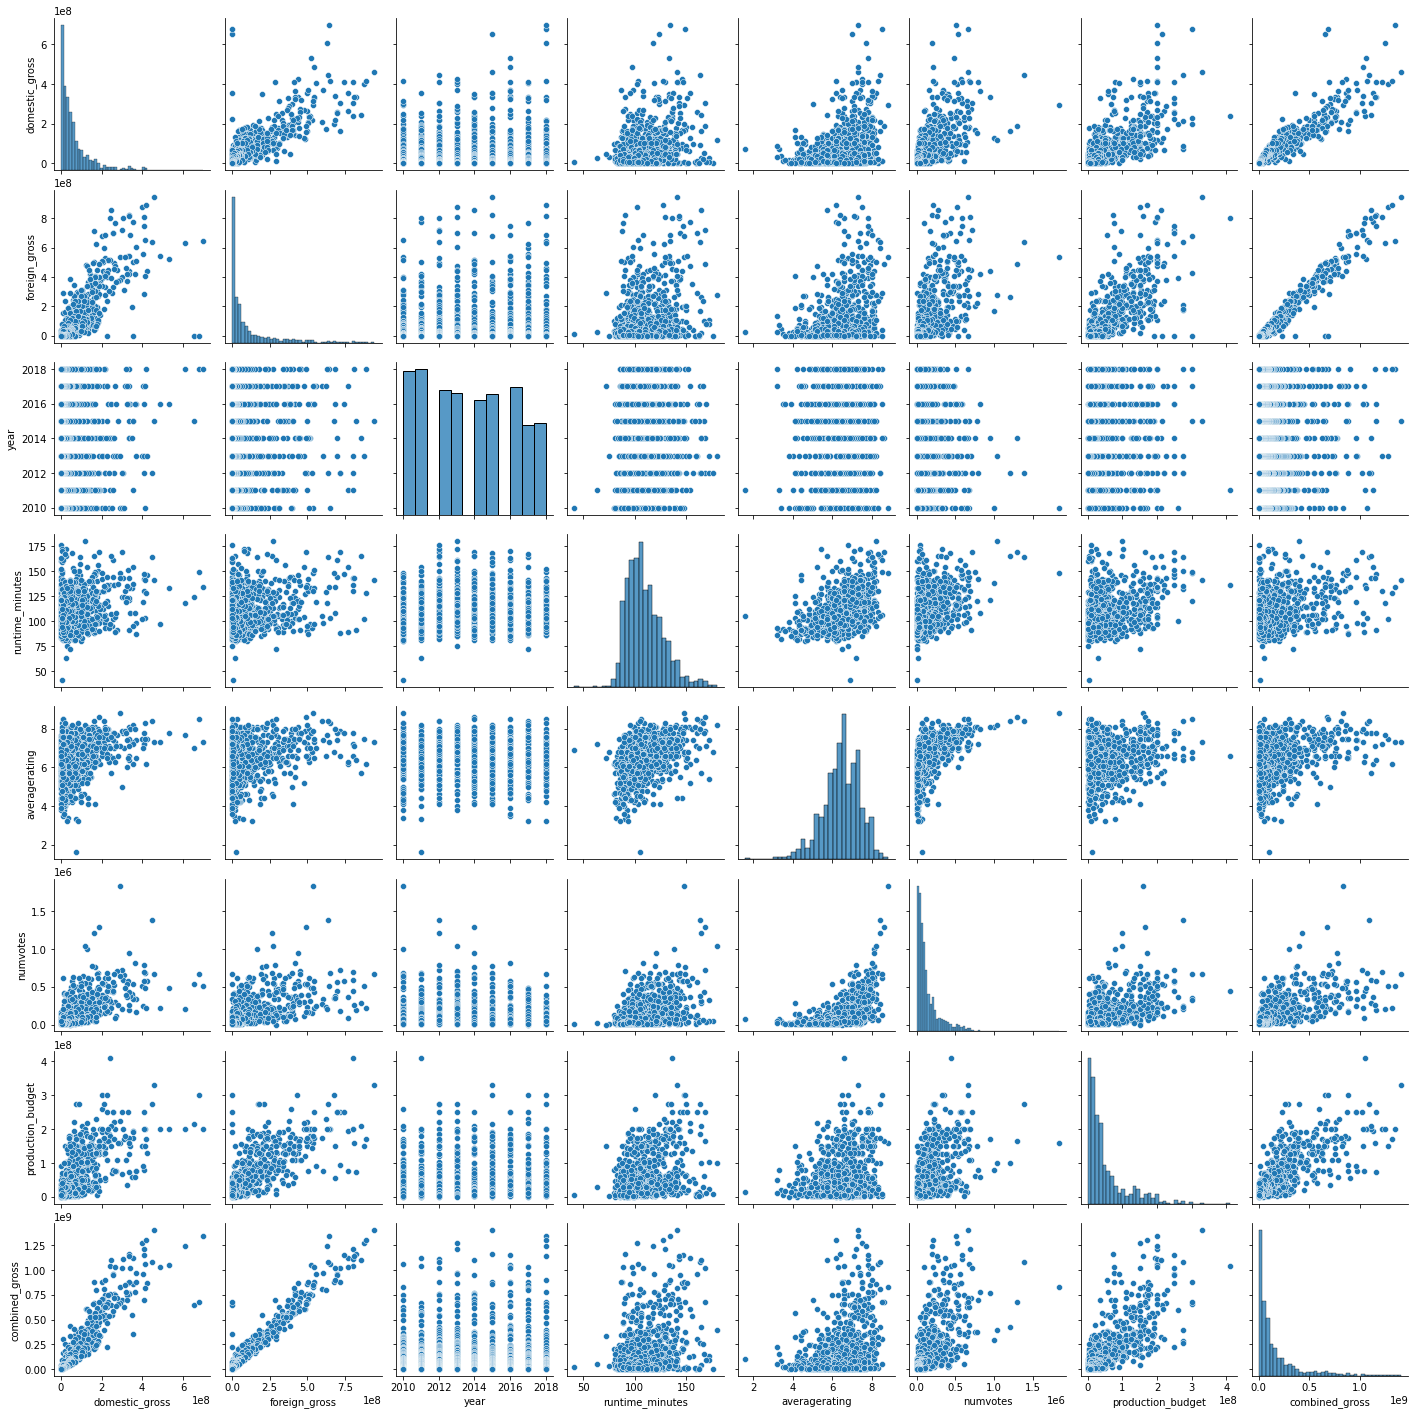

In [69]:
sns.pairplot(df_data_plot)

[Text(0.5, 1.0, 'Worldwide Gross Revenue vs. Average Rating')]

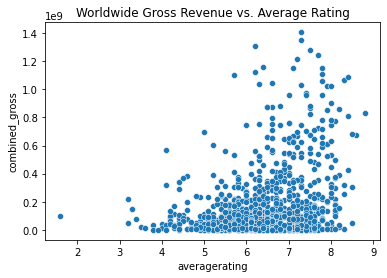

In [126]:

sns.scatterplot(data=df_data_plot, x="averagerating", y="combined_gross").set(title="Worldwide Gross Revenue vs. Average Rating")


Graph for Runtime Minutes versus Combined Gross

[Text(0.5, 1.0, 'Worldwide Gross Revenue vs. Runtime')]

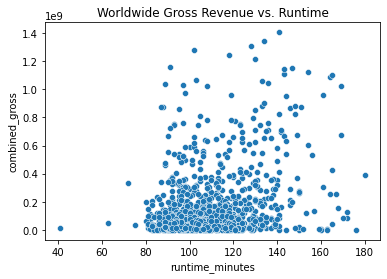

In [127]:
sns.scatterplot(data=df_data_plot, x="runtime_minutes", y="combined_gross").set(title="Worldwide Gross Revenue vs. Runtime")


In [70]:
top_gross = df_combined.sort_values(by="combined_gross", ascending=False)
top_gross.head(10)

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,combined_gross
619,Avengers: Age of Ultron,BV,"459,000,000.0","946,400,000.0",2015,Avengers: Age of Ultron_2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",7.3,665594,"May 1, 2015",Avengers: Age of Ultron,330600000,"1,405,400,000.0"
939,Black Panther,BV,"700,100,000.0","646,900,000.0",2018,Black Panther_2018,tt1825683,Black Panther,Black Panther,2018,134.0,"Action,Adventure,Sci-Fi",7.3,516148,"Feb 16, 2018",Black Panther,200000000,"1,347,000,000.0"
940,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.0","891,800,000.0",2018,Jurassic World: Fallen Kingdom_2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"Action,Adventure,Sci-Fi",6.2,219125,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,"1,309,500,000.0"
392,Frozen,BV,"400,700,000.0","875,700,000.0",2013,Frozen_2013,tt2294629,Frozen,Frozen,2013,102.0,"Adventure,Animation,Comedy",7.5,516998,"Nov 22, 2013",Frozen,150000000,"1,276,400,000.0"
941,Incredibles 2,BV,"608,600,000.0","634,200,000.0",2018,Incredibles 2_2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"Action,Adventure,Animation",7.7,203510,"Jun 15, 2018",Incredibles 2,200000000,"1,242,800,000.0"
393,Iron Man 3,BV,"409,000,000.0","805,800,000.0",2013,Iron Man 3_2013,tt1300854,Iron Man 3,Iron Man Three,2013,130.0,"Action,Adventure,Sci-Fi",7.2,692794,"May 3, 2013",Iron Man 3,200000000,"1,214,800,000.0"
620,Minions,Uni.,"336,000,000.0","823,400,000.0",2015,Minions_2015,tt2293640,Minions,Minions,2015,91.0,"Adventure,Animation,Comedy",6.4,193917,"Jul 10, 2015",Minions,74000000,"1,159,400,000.0"
732,Captain America: Civil War,BV,"408,100,000.0","745,200,000.0",2016,Captain America: Civil War_2016,tt3498820,Captain America: Civil War,Captain America: Civil War,2016,147.0,"Action,Adventure,Sci-Fi",7.8,583507,"May 6, 2016",Captain America: Civil War,250000000,"1,153,300,000.0"
942,Aquaman,WB,"335,100,000.0","812,700,000.0",2018,Aquaman_2018,tt1477834,Aquaman,Aquaman,2018,143.0,"Action,Adventure,Fantasy",7.1,263328,"Dec 21, 2018",Aquaman,160000000,"1,147,800,000.0"
136,Transformers: Dark of the Moon,P/DW,"352,400,000.0","771,400,000.0",2011,Transformers: Dark of the Moon_2011,tt1399103,Transformers: Dark of the Moon,Transformers: Dark of the Moon,2011,154.0,"Action,Adventure,Sci-Fi",6.2,366409,"Jun 29, 2011",Transformers: Dark of the Moon,195000000,"1,123,800,000.0"


In [128]:
top_100_gross = top_gross.head(100)

In [129]:
top_100_gross.describe()


,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,production_budget,combined_gross,Adventure,...,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary,ROI
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,"281,661,999.98","496,123,000.0","2,014.33","2,014.33",121.88,7.162000000000001,"427,858.45","162,952,000.0","777,784,999.98",0.87,...,0.03,0.0,0.29,0.01,0.01,0.32,0.0,0.01,0.0,5.72300976778301
std,"119,550,764.16155016","175,456,839.69845602",2.502745966680872,2.502745966680872,21.55438505621339,0.8085127885772305,"276,518.32734201866","66,854,983.23863663","224,212,274.6773542",0.3379976689896311,...,0.1714466079977653,0.0,0.4560480215720686,0.09999999999999999,0.09999999999999999,0.4688261722621506,0.0,0.09999999999999999,0.0,3.3390313771293028
min,"125,000,000.0",0.0,"2,010.0","2,010.0",87.0,4.1,"42,299.0","35,000,000.0","494,900,000.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.193
25%,"197,950,000.0","387,575,000.0","2,012.0","2,012.0",102.0,6.6,"235,438.0","125,000,000.0","602,074,999.25",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.8027499999999996
50%,"253,000,000.0","451,800,000.0","2,014.0","2,014.0",123.0,7.25,"385,904.5","165,000,000.0","712,450,000.0",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.4933725490196075
75%,"336,275,000.0","598,725,000.0","2,016.25","2,016.25",137.75,7.8,"544,184.75","200,000,000.0","886,425,000.0",1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,6.594370629370629
max,"700,100,000.0","946,400,000.0","2,018.0","2,018.0",169.0,8.8,"1,841,066.0","410,600,000.0","1,405,400,000.0",1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,20.01142857142857


In [71]:
top_gross['year'].max()

2018

In [72]:
top_gross['year'].min()

2010

In [73]:
top_gross["averagerating"].max()

8.8

In [74]:
top_gross["averagerating"].min()

1.6

In [75]:
# Which movie has the highest rating
top_gross.loc[top_gross['averagerating'].idxmax()]


title                              Inception
studio                                    WB
domestic_gross                 292,600,000.0
foreign_gross                  535,700,000.0
year                                    2010
title_year                    Inception_2010
movie_id                           tt1375666
primary_title                      Inception
original_title                     Inception
start_year                              2010
runtime_minutes                        148.0
genres               Action,Adventure,Sci-Fi
averagerating                            8.8
numvotes                             1841066
release_date                    Jul 16, 2010
movie                              Inception
production_budget                  160000000
combined_gross                 828,300,000.0
Name: 1, dtype: object

I was suprised to see that Inception had the highest rating as The Runaways had a 9.2 rating. Let's take a look at the original data

In [76]:
df_imdb.loc[df_imdb['averagerating']=="9.2"]
df_imdb[df_imdb['primary_title']=='The Runaways']


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title_year
699,tt1017451,The Runaways,The Runaways,2010,106.0,"Biography,Drama,Music",6.6,43792,The Runaways_2010
59761,tt6168914,The Runaways,The Runaways,2019,108.0,Adventure,9.2,47,The Runaways_2019


In [77]:
df_bom[df_bom['title']=="The Runaways"]

,title,studio,domestic_gross,foreign_gross,year,title_year
198,The Runaways,App.,"3,600,000.0","1,100,000.0",2010,The Runaways_2010


In [78]:
df_combined[df_combined['title']=="The Runaways"]

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,combined_gross
117,The Runaways,App.,"3,600,000.0","1,100,000.0",2010,The Runaways_2010,tt1017451,The Runaways,The Runaways,2010,106.0,"Biography,Drama,Music",6.6,43792,"Mar 19, 2010",The Runaways,9500000,"4,700,000.0"


It looks like There were two movies called the Runaways in the IMDB data, but the 2010 movie is the one that is also in the Box Office Mojo data. That movie only had a 6.6 average rating, so it looks like this was a good assumption to use (combining data based on title and year)

Now let's breakdown the genre data. There's currently one column which can have multiple values. I'll need a way to view the data that allows the data to be broken out.
1. Get a list of the genres
2. Split the genres in the column into a list of values
3. Populate a set with the list of genres, since a set cannot have duplicate values
4. Create a column for each genre and add a value of 1, where the movie is in that genre

In [79]:
top_gross["genres"].unique()

array(['Action,Adventure,Sci-Fi', 'Adventure,Animation,Comedy',
       'Action,Adventure,Animation', 'Action,Adventure,Fantasy',
       'Action,Adventure,Thriller', 'Action,Thriller',
       'Adventure,Family,Fantasy', 'Action,Adventure,Comedy',
       'Adventure,Fantasy', 'Biography,Drama,Music',
       'Action,Adventure,Family', 'Drama,Sci-Fi,Thriller',
       'Action,Adventure,Drama', 'Horror,Thriller',
       'Adventure,Drama,Fantasy', 'Adventure,Drama,Sci-Fi',
       'Animation,Comedy,Family', 'Action,Crime,Thriller',
       'Comedy,Mystery', 'Drama,Romance,Thriller', 'Comedy,Fantasy',
       'Action,Biography,Drama', 'Action,Adventure,Crime',
       'Action,Adventure,Horror', 'Action,Adventure,Biography',
       'Action,Horror,Sci-Fi', 'Action,Drama,History',
       'Action,Drama,Sci-Fi', 'Action,Sci-Fi,Thriller',
       'Comedy,Drama,Music', 'Biography,Drama,Musical', 'Drama,Western',
       'Adventure,Mystery,Sci-Fi', 'Biography,Crime,Drama',
       'Drama,Romance', 'Action,Sci

In [80]:
top_gross["genres"] = top_gross["genres"].apply(lambda x: x.split(",") if x else x)
top_gross.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,combined_gross
619,Avengers: Age of Ultron,BV,"459,000,000.0","946,400,000.0",2015,Avengers: Age of Ultron_2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"[Action, Adventure, Sci-Fi]",7.3,665594,"May 1, 2015",Avengers: Age of Ultron,330600000,"1,405,400,000.0"
939,Black Panther,BV,"700,100,000.0","646,900,000.0",2018,Black Panther_2018,tt1825683,Black Panther,Black Panther,2018,134.0,"[Action, Adventure, Sci-Fi]",7.3,516148,"Feb 16, 2018",Black Panther,200000000,"1,347,000,000.0"
940,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.0","891,800,000.0",2018,Jurassic World: Fallen Kingdom_2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,128.0,"[Action, Adventure, Sci-Fi]",6.2,219125,"Jun 22, 2018",Jurassic World: Fallen Kingdom,170000000,"1,309,500,000.0"
392,Frozen,BV,"400,700,000.0","875,700,000.0",2013,Frozen_2013,tt2294629,Frozen,Frozen,2013,102.0,"[Adventure, Animation, Comedy]",7.5,516998,"Nov 22, 2013",Frozen,150000000,"1,276,400,000.0"
941,Incredibles 2,BV,"608,600,000.0","634,200,000.0",2018,Incredibles 2_2018,tt3606756,Incredibles 2,Incredibles 2,2018,118.0,"[Action, Adventure, Animation]",7.7,203510,"Jun 15, 2018",Incredibles 2,200000000,"1,242,800,000.0"


In [81]:
all_genres = set()

for genres in top_gross["genres"]:
    if genres:
        all_genres.update(genres)

all_genres

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [82]:
len(all_genres)

21

There are 21 total genre categories. Now I'll add these as columns to the end of the dataset, with a preset zero value.

In [83]:
for genre in all_genres:
    top_gross[genre] = np.zeros(shape=top_gross.shape[0])
                          
top_gross.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,...,Fantasy,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary
619,Avengers: Age of Ultron,BV,"459,000,000.0","946,400,000.0",2015,Avengers: Age of Ultron_2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
939,Black Panther,BV,"700,100,000.0","646,900,000.0",2018,Black Panther_2018,tt1825683,Black Panther,Black Panther,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.0","891,800,000.0",2018,Jurassic World: Fallen Kingdom_2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,Frozen,BV,"400,700,000.0","875,700,000.0",2013,Frozen_2013,tt2294629,Frozen,Frozen,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,Incredibles 2,BV,"608,600,000.0","634,200,000.0",2018,Incredibles 2_2018,tt3606756,Incredibles 2,Incredibles 2,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [84]:
for index, row in top_gross.iterrows():
    if row['genres']:
        for genre in row['genres']:
            top_gross.loc[index, genre] = 1

top_gross.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,...,Fantasy,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary
619,Avengers: Age of Ultron,BV,"459,000,000.0","946,400,000.0",2015,Avengers: Age of Ultron_2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
939,Black Panther,BV,"700,100,000.0","646,900,000.0",2018,Black Panther_2018,tt1825683,Black Panther,Black Panther,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
940,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.0","891,800,000.0",2018,Jurassic World: Fallen Kingdom_2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
392,Frozen,BV,"400,700,000.0","875,700,000.0",2013,Frozen_2013,tt2294629,Frozen,Frozen,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
941,Incredibles 2,BV,"608,600,000.0","634,200,000.0",2018,Incredibles 2_2018,tt3606756,Incredibles 2,Incredibles 2,2018,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [85]:
crime = top_gross[top_gross['Crime']==1]
crime.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,...,Fantasy,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary
139,Fast Five,Uni.,"209,800,000.0","416,300,000.0",2011,Fast Five_2011,tt1596343,Fast Five,Fast Five,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,Sherlock Holmes: A Game of Shadows,WB,"186,800,000.0","358,600,000.0",2011,Sherlock Holmes: A Game of Shadows_2011,tt1515091,Sherlock Holmes: A Game of Shadows,Sherlock Holmes: A Game of Shadows,2011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,The Wolf of Wall Street,Par.,"116,900,000.0","275,100,000.0",2013,The Wolf of Wall Street_2013,tt0993846,The Wolf of Wall Street,The Wolf of Wall Street,2013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,Furious 7,Uni.,"353,000,000.0",0.0,2015,Furious 7_2015,tt2820852,Furious 7,Furious Seven,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
408,Now You See Me,LG/S,"117,700,000.0","234,000,000.0",2013,Now You See Me_2013,tt1670345,Now You See Me,Now You See Me,2013,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [86]:
top_gross.loc[top_gross['Crime'] == 1, 'combined_gross'].sum()

13893095899.0

In [87]:
cols = list(top_gross.columns)

In [88]:
genre_cols = cols[18:]

In [89]:
genre_count = {}
genre_sum = {}

# Iterate through the columns associated with genres, setting the name of the
# column as the keys in the dictionary.
for col in genre_cols:
    # Get the total of all the genre counts where the value equaled 1,
    # which we set previously
    count = np.sum(top_gross[col] == 1).sum()
    g_sum = top_gross.loc[top_gross[col] == 1, 'combined_gross'].sum()
    # Set the values of the dictionary equal to the total of the counts
    genre_count[col] = count
    genre_sum[col] = g_sum

In [90]:
genre_count

{'Adventure': 278,
 'Biography': 104,
 'Family': 66,
 'Western': 6,
 'Comedy': 387,
 'Action': 327,
 'Crime': 159,
 'Romance': 140,
 'Sport': 21,
 'Thriller': 178,
 'Drama': 500,
 'Fantasy': 87,
 'Horror': 103,
 'Musical': 4,
 'Sci-Fi': 96,
 'Mystery': 80,
 'History': 30,
 'Animation': 84,
 'War': 7,
 'Music': 31,
 'Documentary': 7}

In [91]:
genre_sum

{'Adventure': 104422187493.0,
 'Biography': 9848491998.0,
 'Family': 11626578300.0,
 'Western': 952224000.0,
 'Comedy': 61798517692.0,
 'Action': 87616724093.0,
 'Crime': 13893095899.0,
 'Romance': 10199878298.0,
 'Sport': 1408350500.0,
 'Thriller': 24195982198.0,
 'Drama': 43571124993.0,
 'Fantasy': 21323019799.0,
 'Horror': 9848478000.0,
 'Musical': 587700000.0,
 'Sci-Fi': 36120895999.0,
 'Mystery': 9289725999.0,
 'History': 3373799999.0,
 'Animation': 35719000997.0,
 'War': 376830800.0,
 'Music': 3157934300.0,
 'Documentary': 522891400.0}

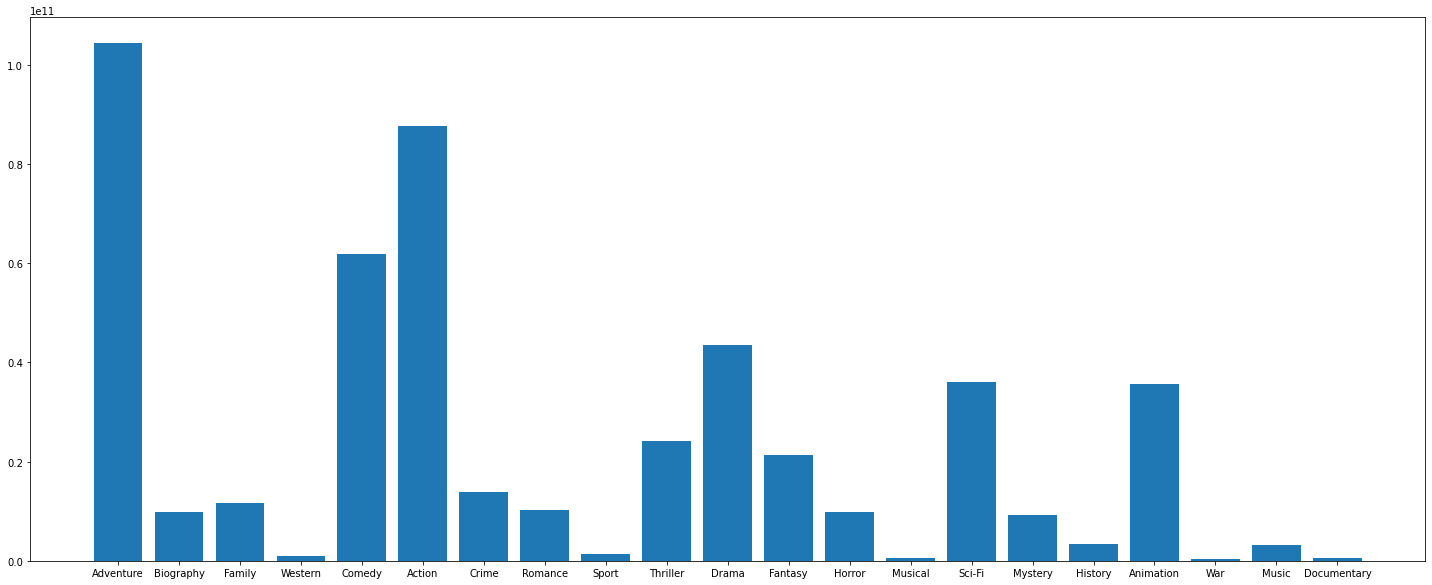

In [92]:
names = list(genre_sum.keys())
values = list(genre_sum.values())

plt.figure(figsize=(25, 10))
plt.bar(range(len(genre_sum)), values, tick_label=names)
plt.show()

In [93]:
sorted_list_count = dict(sorted(genre_count.items(), key = lambda x:x[1], reverse = True))
sorted_list_count

{'Drama': 500,
 'Comedy': 387,
 'Action': 327,
 'Adventure': 278,
 'Thriller': 178,
 'Crime': 159,
 'Romance': 140,
 'Biography': 104,
 'Horror': 103,
 'Sci-Fi': 96,
 'Fantasy': 87,
 'Animation': 84,
 'Mystery': 80,
 'Family': 66,
 'Music': 31,
 'History': 30,
 'Sport': 21,
 'War': 7,
 'Documentary': 7,
 'Western': 6,
 'Musical': 4}

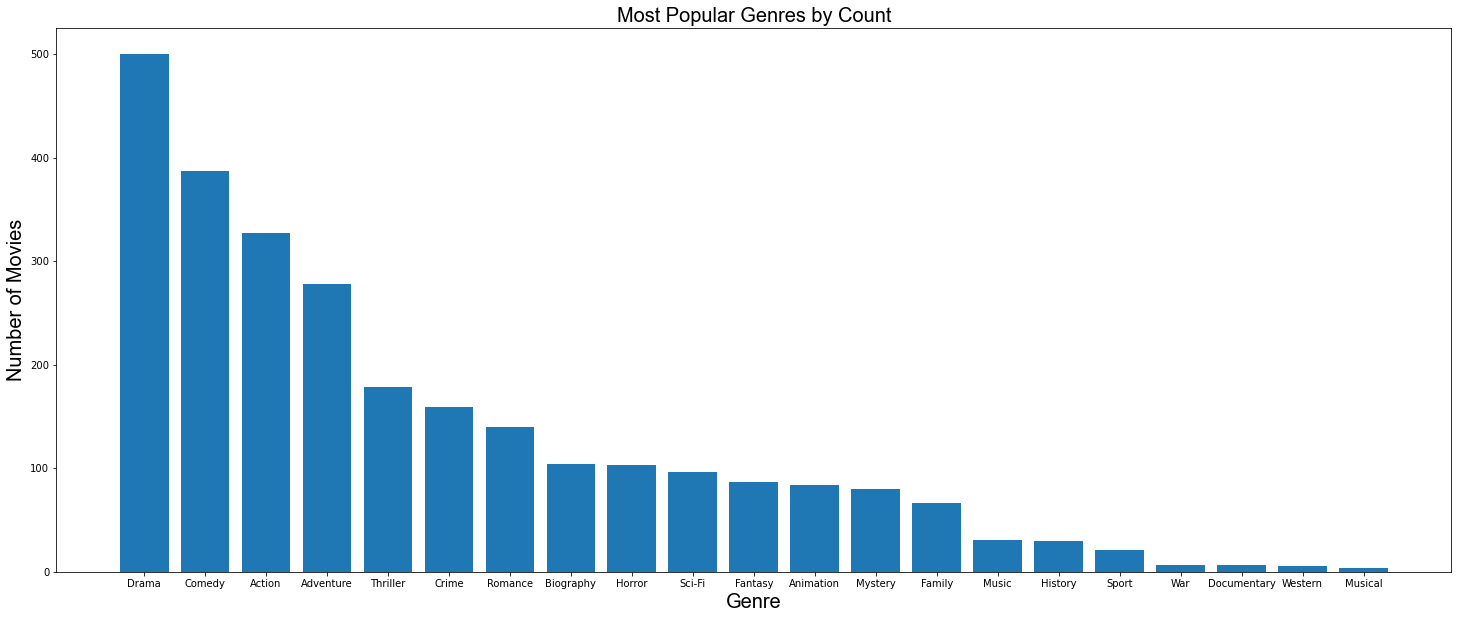

In [121]:
names = list(sorted_list_count.keys())
values = list(sorted_list_count.values())

plt.figure(figsize=(25, 10))
plt.bar(range(len(sorted_list_count)), values, tick_label=names)
font1 = {'family':'arial','color':'black','size':20}
plt.xlabel("Genre", fontdict=font1)
plt.ylabel("Number of Movies", fontdict=font1)
plt.title("Most Popular Genres by Count", fontdict=font1)
plt.show()

In [95]:
sorted_list_sum = dict(sorted(genre_sum.items(), key = lambda x:x[1], reverse = True))
sorted_list_sum

{'Adventure': 104422187493.0,
 'Action': 87616724093.0,
 'Comedy': 61798517692.0,
 'Drama': 43571124993.0,
 'Sci-Fi': 36120895999.0,
 'Animation': 35719000997.0,
 'Thriller': 24195982198.0,
 'Fantasy': 21323019799.0,
 'Crime': 13893095899.0,
 'Family': 11626578300.0,
 'Romance': 10199878298.0,
 'Biography': 9848491998.0,
 'Horror': 9848478000.0,
 'Mystery': 9289725999.0,
 'History': 3373799999.0,
 'Music': 3157934300.0,
 'Sport': 1408350500.0,
 'Western': 952224000.0,
 'Musical': 587700000.0,
 'Documentary': 522891400.0,
 'War': 376830800.0}

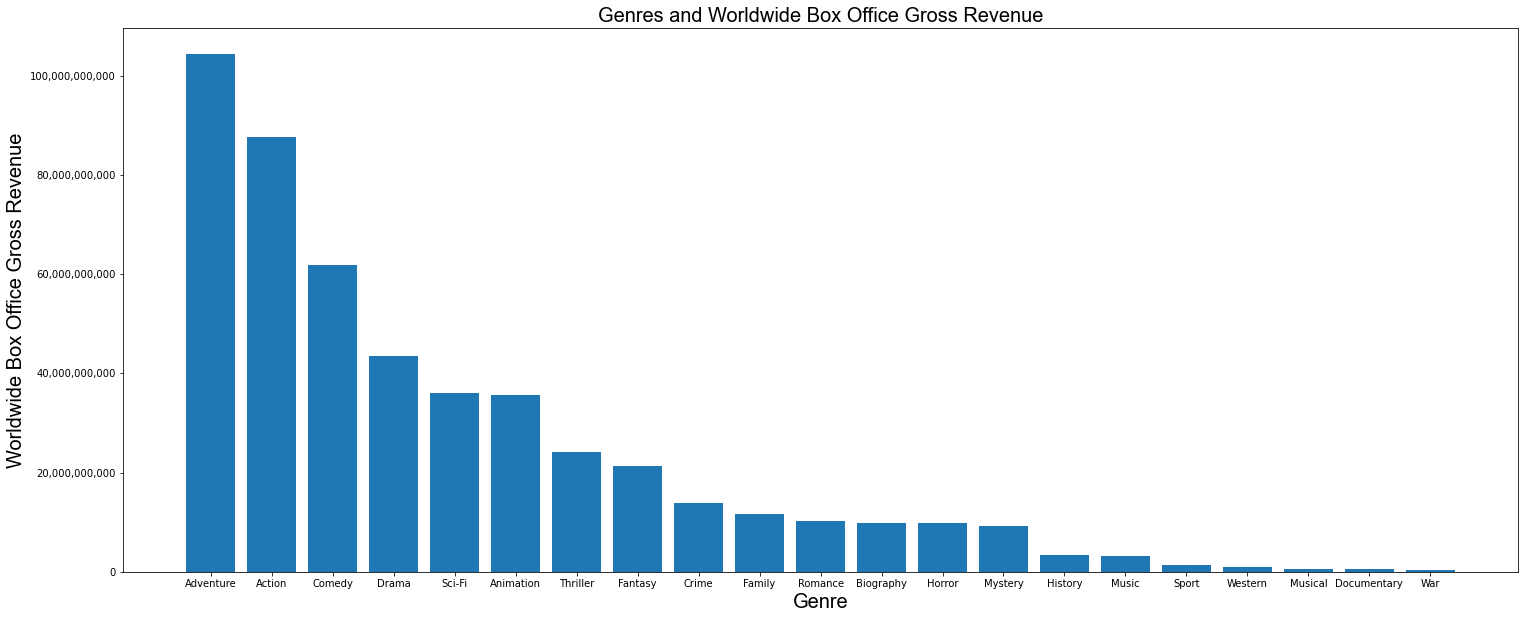

In [119]:
names = list(sorted_list_sum.keys())
values = list(sorted_list_sum.values())

plt.figure(figsize=(25, 10))
plt.bar(range(len(sorted_list_sum)), values, tick_label=names)
font1 = {'family':'arial','color':'black','size':20}
plt.xlabel("Genre", fontdict=font1)
plt.ylabel("Worldwide Box Office Gross Revenue", fontdict=font1)
plt.title("Genres and Worldwide Box Office Gross Revenue", fontdict=font1)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

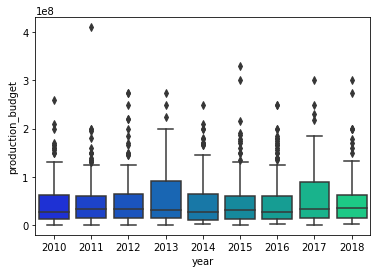

In [97]:
#plt.box(top_gross['production_budget'])
#plt.show

sns.boxplot(top_gross['year'], top_gross['production_budget'], palette="winter")
plt.show

In [98]:
top_gross.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,production_budget,combined_gross,Adventure,...,Fantasy,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary
count,"1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0",...,"1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0","1,025.0"
mean,"69,586,337.84292683","100,808,037.65170732","2,013.658536585366","2,013.658536585366",109.93463414634147,6.45960975609756,"146,317.8487804878","52,763,544.048780486","170,394,375.49463415",0.27121951219512197,...,0.08487804878048781,0.10048780487804879,0.003902439024390244,0.09365853658536585,0.07804878048780488,0.02926829268292683,0.08195121951219513,0.006829268292682927,0.03024390243902439,0.006829268292682927
std,"89,888,424.33982028","157,739,404.7124826",2.546920591017949,2.546920591017949,17.840346120384602,0.9422731842788351,"178,041.95803407955","58,982,785.69195954","235,730,178.80732855",0.4448061546830287,...,0.2788361865010333,0.30079607284508286,0.062377929570970665,0.291495303898917,0.2683792820327051,0.16863986921189447,0.27442428650611495,0.08239692378226561,0.1713413277926726,0.08239692378226561
min,0.0,0.0,"2,010.0","2,010.0",41.0,1.6,24.0,"50,000.0","11,800.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,"14,300,000.0","6,600,000.0","2,011.0","2,011.0",97.0,5.9,"37,939.0","13,000,000.0","25,200,000.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,"39,300,000.0","35,300,000.0","2,014.0","2,014.0",107.0,6.5,"86,118.0","30,000,000.0","79,400,000.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,"84,800,000.0","113,400,000.0","2,016.0","2,016.0",120.0,7.1,"181,189.0","68,000,000.0","208,300,000.0",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,"700,100,000.0","946,400,000.0","2,018.0","2,018.0",180.0,8.8,"1,841,066.0","410,600,000.0","1,405,400,000.0",1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [99]:
top_gross['budget_cat'], cut_bin = pd.qcut(top_gross['production_budget'], q = 3, labels = ['Low', 'Med', 'High'], retbins = True)
top_gross.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,...,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary,budget_cat
619,Avengers: Age of Ultron,BV,"459,000,000.0","946,400,000.0",2015,Avengers: Age of Ultron_2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High
939,Black Panther,BV,"700,100,000.0","646,900,000.0",2018,Black Panther_2018,tt1825683,Black Panther,Black Panther,2018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High
940,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.0","891,800,000.0",2018,Jurassic World: Fallen Kingdom_2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High
392,Frozen,BV,"400,700,000.0","875,700,000.0",2013,Frozen_2013,tt2294629,Frozen,Frozen,2013,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,High
941,Incredibles 2,BV,"608,600,000.0","634,200,000.0",2018,Incredibles 2_2018,tt3606756,Incredibles 2,Incredibles 2,2018,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,High


<function matplotlib.pyplot.show(close=None, block=None)>

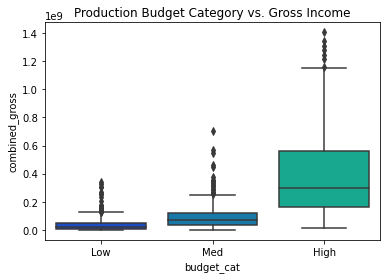

In [135]:
sns.boxplot(top_gross['budget_cat'], top_gross['combined_gross'], palette="winter").set(title="Production Budget Category vs. Gross Income")
plt.show

In [138]:
top_gross[top_gross['budget_cat']=="High"].describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,production_budget,combined_gross,Adventure,...,Horror,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary,ROI
count,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,...,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0,322.0
mean,"144,241,288.80124223","249,358,040.36956522","2,013.7173913043478","2,013.7173913043478",115.9223602484472,6.593478260869566,"253,556.17701863355","122,263,975.1552795","393,599,329.1708075",0.6366459627329193,...,0.037267080745341616,0.009316770186335404,0.17701863354037267,0.037267080745341616,0.021739130434782608,0.2204968944099379,0.003105590062111801,0.006211180124223602,0.003105590062111801,3.270145034275081
std,"119,599,759.33848867","204,524,619.2325341",2.526669343427132,2.526669343427132,19.783962399975607,0.9134786892562491,"238,715.8294217624","60,026,173.47379327","300,302,993.2202218",0.4817141563964529,...,0.18971034677389464,0.09622225196886365,0.38227853478371293,0.18971034677389464,0.1460574939814837,0.4152269975469838,0.05572782125753529,0.07868818623803465,0.05572782125753529,2.344893864394733
min,"195,000.0",0.0,"2,010.0","2,010.0",72.0,3.3,24.0,"50,200,000.0","16,195,000.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.17994444444444443
25%,"59,800,000.0","92,275,000.0","2,012.0","2,012.0",100.0,6.0,"95,162.75","70,000,000.0","164,500,000.0",0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.788455882352941
50%,"103,650,000.0","193,150,000.0","2,014.0","2,014.0",114.0,6.6,"179,795.5","110,000,000.0","299,350,000.0",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.7204545454545457
75%,"187,800,000.0","367,400,000.0","2,016.0","2,016.0",130.0,7.2,"337,814.5","160,000,000.0","560,400,000.0",1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.106818181818182
max,"700,100,000.0","946,400,000.0","2,018.0","2,018.0",180.0,8.8,"1,841,066.0","410,600,000.0","1,405,400,000.0",1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,16.42909090909091


In [101]:
top_gross['ROI'] = top_gross['combined_gross']/top_gross['production_budget']
top_gross.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,...,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary,budget_cat,ROI
619,Avengers: Age of Ultron,BV,"459,000,000.0","946,400,000.0",2015,Avengers: Age of Ultron_2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High,4.2510586811857225
939,Black Panther,BV,"700,100,000.0","646,900,000.0",2018,Black Panther_2018,tt1825683,Black Panther,Black Panther,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High,6.735
940,Jurassic World: Fallen Kingdom,Uni.,"417,700,000.0","891,800,000.0",2018,Jurassic World: Fallen Kingdom_2018,tt4881806,Jurassic World: Fallen Kingdom,Jurassic World: Fallen Kingdom,2018,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,High,7.702941176470588
392,Frozen,BV,"400,700,000.0","875,700,000.0",2013,Frozen_2013,tt2294629,Frozen,Frozen,2013,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,High,8.509333333333334
941,Incredibles 2,BV,"608,600,000.0","634,200,000.0",2018,Incredibles 2_2018,tt3606756,Incredibles 2,Incredibles 2,2018,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,High,6.214


<function matplotlib.pyplot.show(close=None, block=None)>

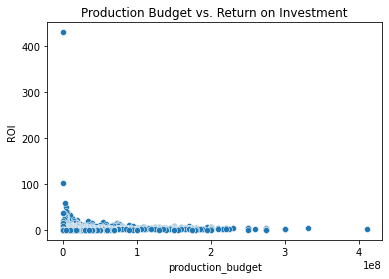

In [130]:


sns.scatterplot(x='production_budget', y='ROI', data=top_gross).set(title="Production Budget vs. Return on Investment")
plt.show

In [103]:
top_roi = top_gross.sort_values(by=['ROI'], ascending=False)
top_roi.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,...,Musical,Sci-Fi,Mystery,History,Animation,War,Music,Documentary,budget_cat,ROI
690,The Gallows,WB (NL),"22,800,000.0","20,200,000.0",2015,The Gallows_2015,tt2309260,The Gallows,The Gallows,2015,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Low,430.0
327,The Devil Inside,Par.,"53,300,000.0","48,500,000.0",2012,The Devil Inside_2012,tt1560985,The Devil Inside,The Devil Inside,2012,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,101.8
30,Paranormal Activity 2,Par.,"84,800,000.0","92,800,000.0",2010,Paranormal Activity 2_2010,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low,59.2
877,Get Out,Uni.,"176,000,000.0","79,400,000.0",2017,Get Out_2017,tt5052448,Get Out,Get Out,2017,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Low,51.08
162,Paranormal Activity 3,Par.,"104,000,000.0","103,000,000.0",2011,Paranormal Activity 3_2011,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Low,41.4


In [104]:
top_roi.drop(columns=genre_cols, inplace=True)
top_roi.head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,combined_gross,budget_cat,ROI
690,The Gallows,WB (NL),"22,800,000.0","20,200,000.0",2015,The Gallows_2015,tt2309260,The Gallows,The Gallows,2015,81.0,"[Horror, Mystery, Thriller]",4.2,17763,"Jul 10, 2015",The Gallows,100000,"43,000,000.0",Low,430.0
327,The Devil Inside,Par.,"53,300,000.0","48,500,000.0",2012,The Devil Inside_2012,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,[Horror],4.2,33522,"Jan 6, 2012",The Devil Inside,1000000,"101,800,000.0",Low,101.8
30,Paranormal Activity 2,Par.,"84,800,000.0","92,800,000.0",2010,Paranormal Activity 2_2010,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,[Horror],5.7,93122,"Oct 20, 2010",Paranormal Activity 2,3000000,"177,600,000.0",Low,59.2
877,Get Out,Uni.,"176,000,000.0","79,400,000.0",2017,Get Out_2017,tt5052448,Get Out,Get Out,2017,104.0,"[Horror, Mystery, Thriller]",7.7,400474,"Feb 24, 2017",Get Out,5000000,"255,400,000.0",Low,51.08
162,Paranormal Activity 3,Par.,"104,000,000.0","103,000,000.0",2011,Paranormal Activity 3_2011,tt1778304,Paranormal Activity 3,Paranormal Activity 3,2011,83.0,"[Horror, Mystery, Thriller]",5.8,85689,"Oct 21, 2011",Paranormal Activity 3,5000000,"207,000,000.0",Low,41.4


In [105]:
top_roi[top_roi['budget_cat']=="High"].head()

,title,studio,domestic_gross,foreign_gross,year,title_year,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,movie,production_budget,combined_gross,budget_cat,ROI
943,Bohemian Rhapsody,Fox,"216,400,000.0","687,200,000.0",2018,Bohemian Rhapsody_2018,tt1727824,Bohemian Rhapsody,Bohemian Rhapsody,2018,134.0,"[Biography, Drama, Music]",8.0,345466,"Nov 2, 2018",Bohemian Rhapsody,55000000,"903,600,000.0",High,16.42909090909091
620,Minions,Uni.,"336,000,000.0","823,400,000.0",2015,Minions_2015,tt2293640,Minions,Minions,2015,91.0,"[Adventure, Animation, Comedy]",6.4,193917,"Jul 10, 2015",Minions,74000000,"1,159,400,000.0",High,15.667567567567568
854,Despicable Me 3,Uni.,"264,600,000.0","770,200,000.0",2017,Despicable Me 3_2017,tt3469046,Despicable Me 3,Despicable Me 3,2017,89.0,"[Adventure, Animation, Comedy]",6.3,92580,"Jun 30, 2017",Despicable Me 3,75000000,"1,034,800,000.0",High,13.797333333333333
738,Deadpool,Fox,"363,100,000.0","420,000,000.0",2016,Deadpool_2016,tt1431045,Deadpool,Deadpool,2016,108.0,"[Action, Adventure, Comedy]",8.0,820847,"Feb 12, 2016",Deadpool,58000000,"783,100,000.0",High,13.501724137931035
394,Despicable Me 2,Uni.,"368,100,000.0","602,700,000.0",2013,Despicable Me 2_2013,tt1690953,Despicable Me 2,Despicable Me 2,2013,98.0,"[Adventure, Animation, Comedy]",7.4,344230,"Jul 3, 2013",Despicable Me 2,76000000,"970,800,000.0",High,12.773684210526316


In [131]:
top_100_roi = top_roi.head(100)

In [132]:
top_100_roi.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes,production_budget,combined_gross,ROI
count,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
mean,"106,323,370.0","150,808,660.0","2,014.05","2,014.05",106.5,6.693999999999999,"203,176.26","20,819,126.5","257,132,030.0",20.872719948677
std,"104,556,399.42219913","194,172,621.65945396",2.52012104888041,2.52012104888041,19.155134870817065,1.053500178577406,"181,343.06364700364","26,506,220.168641694","283,721,440.7695915",43.2495590105066
min,"237,000.0",0.0,"2,010.0","2,010.0",75.0,4.1,"7,880.0","100,000.0","1,600,000.0",8.36
25%,"35,325,000.0","27,700,000.0","2,012.0","2,012.0",92.0,6.175000000000001,"67,554.25","4,000,000.0","73,200,000.0",9.50948275862069
50%,"67,500,000.0","72,050,000.0","2,014.0","2,014.0",103.0,6.8,"142,913.5","10,500,000.0","147,650,000.0",12.08
75%,"142,475,000.0","186,200,000.0","2,016.0","2,016.0",117.25,7.5,"305,801.25","23,500,000.0","309,750,000.0",19.762857142857143
max,"408,000,000.0","875,700,000.0","2,018.0","2,018.0",167.0,8.5,"820,847.0","150,000,000.0","1,276,400,000.0",430.0


<function matplotlib.pyplot.show(close=None, block=None)>

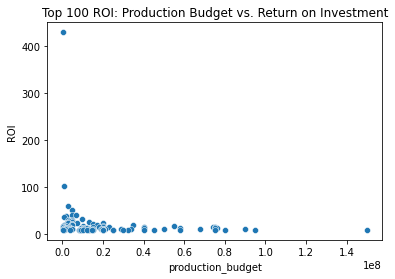

In [134]:

sns.scatterplot(x='production_budget', y='ROI', data=top_100_roi).set(title="Top 100 ROI: Production Budget vs. Return on Investment")
plt.show